### Simplified self-attention

In [2]:
from importlib.metadata import version

print("torch version:", version("torch"))

torch version: 2.2.1+cu121


### Why do we need attention?
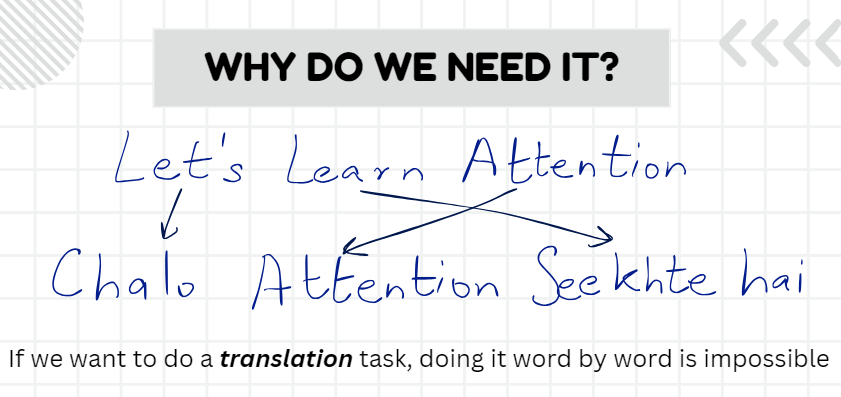

Self-attention in transformers is a technique designed to enhance the input representations by helping each token to engage with different tokens in the same sequence.

For example, if the sentence is - ‘The cat is sitting on the mat because it is warm’. Here, the word ‘mat’ will derive information from the word ‘warm’ as well as the word ‘cat’. It’s important to note that the here its not a normal mat, but it’s a warm mat on which a cat is sitting!

### A simple self-attention mechanism without trainable weights

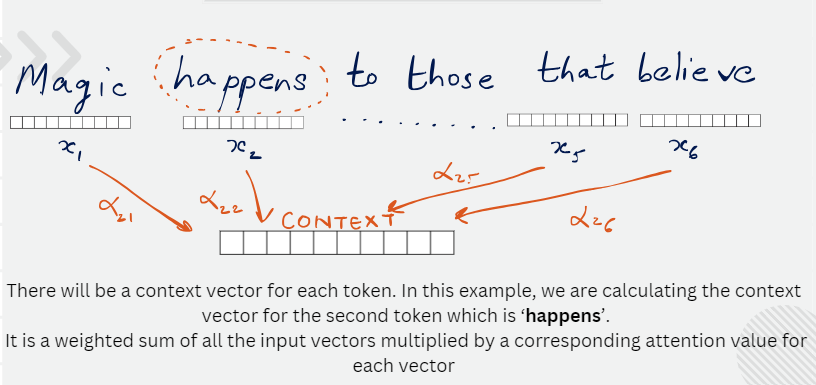

In [3]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Magic     (x^1)
   [0.55, 0.87, 0.66], # happens  (x^2)
   [0.57, 0.85, 0.64], # to   (x^3)
   [0.22, 0.58, 0.33], # those     (x^4)
   [0.77, 0.25, 0.10], # that      (x^5)
   [0.05, 0.80, 0.55]] # believe     (x^6)
)

### Calculating the attention scores which are normalised
Here we calculate the attention score for the first query vector 'Magic' with respect to all the other inputs in the sequence. 

In [4]:
query = inputs[0]
attn_scores_1 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_1[i] = torch.dot(x_i,query)

attn_scores_1 = attn_scores_1/attn_scores_1.sum()
print(attn_scores_1)

tensor([0.2241, 0.2140, 0.2113, 0.1066, 0.1026, 0.1415])


A better approach to calculate the the weighted sum is using the softmax function

In [5]:
attn_scores_1 = torch.softmax(attn_scores_1,dim=0)
print(attn_scores_1)

tensor([0.1763, 0.1745, 0.1740, 0.1567, 0.1561, 0.1623])


Now, let's calculate the final context vector for 'Magic'

In [6]:
query = inputs[1]

context_vec_1 = torch.zeros(query.shape)

for i, x_i in enumerate(inputs):
    context_vec_1 += attn_scores_1[i]*x_i
print(context_vec_1)

tensor([0.4338, 0.5860, 0.5401])


### How can we find the attention scores in an elegant way? Yes, we can do matrix multiplication!

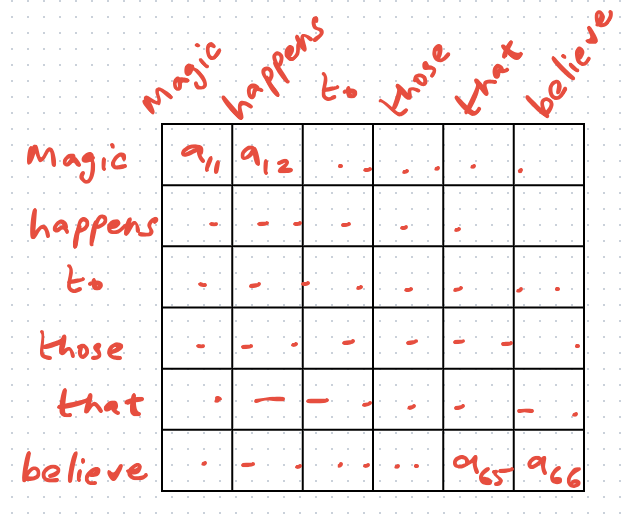

In [7]:
attn_scores = inputs @ inputs.T
attn_scores = torch.softmax(attn_scores, dim=-1)
attn_scores

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

### To calculate the final context vectors for all queries, we can take one more matrix multiplication!

In [8]:
all_context_vectors = attn_scores @ inputs
print(all_context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
